# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

%load_ext autoreload
%autoreload 2

## Load Data From YFinance

In [2]:
df_aapl = yf.download('AAPL', start='2018-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600
2018-01-03,40.419781,40.964251,40.356418,40.490187,118071600
2018-01-04,40.607525,40.710787,40.384575,40.492528,89738400
2018-01-05,41.069843,41.156676,40.612209,40.703736,94640000
2018-01-08,40.917313,41.213014,40.818742,40.917313,82271200


## Generate Trading Signals

In [3]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2018-10-16,52.733982,52.933384,51.454504,51.969618,116736000,52.139060,44.800209
2018-10-17,52.506088,52.850289,52.066934,52.769580,91541600,52.209342,44.860605
2018-10-18,51.278843,52.161897,50.561954,51.715621,130325200,52.254418,44.914900
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307401,44.972162
2018-10-22,52.377895,53.021197,51.971978,52.173748,115168400,52.369689,45.028702


In [4]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733982,52.933384,51.454504,51.969618,116736000,52.139060,44.800209,1
2018-10-17,52.506088,52.850289,52.066934,52.769580,91541600,52.209342,44.860605,1
2018-10-18,51.278843,52.161897,50.561954,51.715621,130325200,52.254418,44.914900,1
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307401,44.972162,1
2018-10-22,52.377895,53.021197,51.971978,52.173748,115168400,52.369689,45.028702,1


In [41]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
print(buy_markers, sell_markers)

Date
2018-10-16    1.0
2019-05-06    1.0
2022-09-26    1.0
2023-03-22    1.0
2024-06-13    1.0
Name: Signal, dtype: float64 Date
2018-12-21   -1.0
2022-06-03   -1.0
2022-10-07   -1.0
2024-03-14   -1.0
2025-04-07   -1.0
Name: Signal, dtype: float64


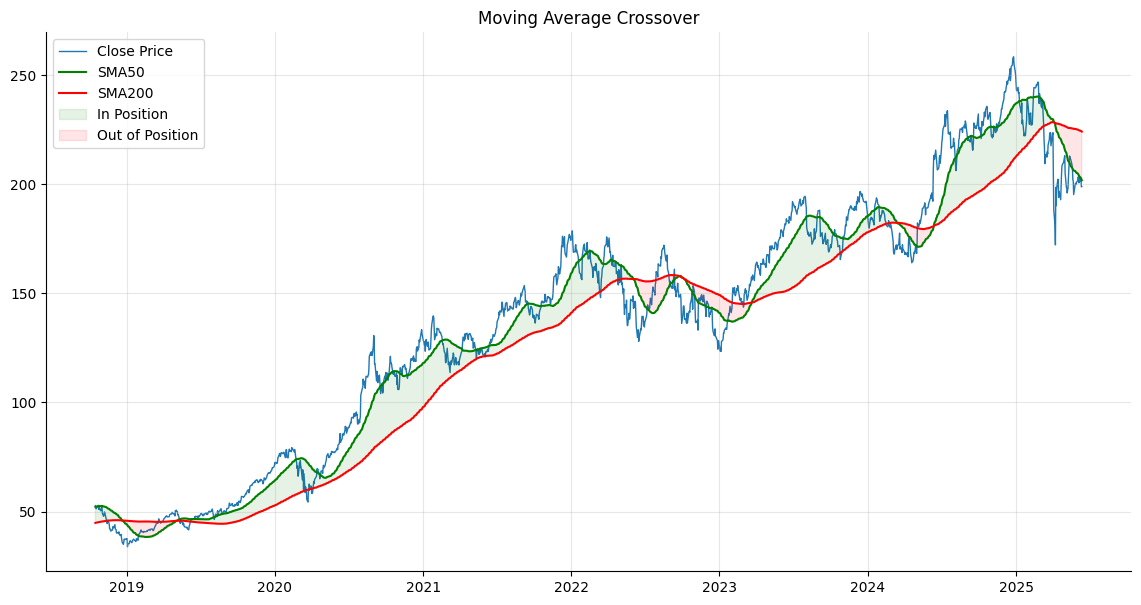

In [44]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                    color='Green',
                    alpha=0.1,
                    label="In Position")

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                    color='Red',
                    alpha=0.1,
                    label="Out of Position")          

ax.legend(loc='upper left')

plt.show;

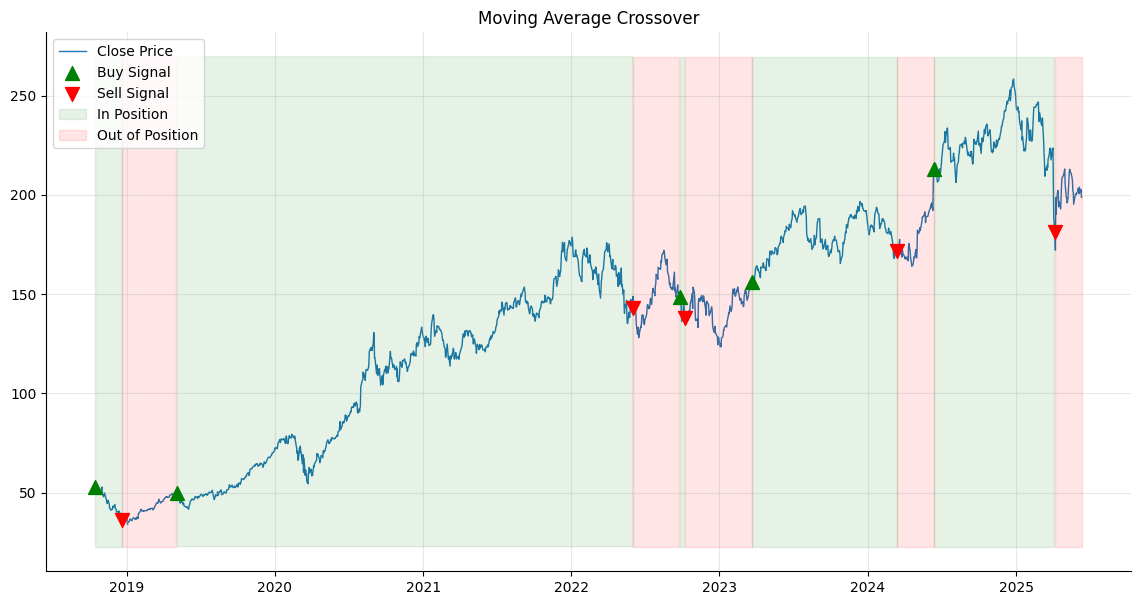

In [47]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

y_min, y_max = ax.get_ybound()

# ax.fill_between(df_aapl.index,
#                 df_aapl.max(),
#                 df_aapl['Close'].min(),
#                 where=(df_aapl['SMA50'] > df_aapl['SMA200']),
#                 color='Green',
#                 alpha=0.1,
#                 label='In Position')

# ax.fill_between(df_aapl.index,
#                 df_aapl['Close'].max(),
#                 df_aapl['Close'].min(),
#                 where=(df_aapl['SMA50'] < df_aapl['SMA200']),
#                 color='Red',
#                 alpha=0.1,
#                 label='Out of Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

# Prevents duplicate keys being added to the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show;

## Calculate Returns

In [ ]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

In [ ]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

In [ ]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

In [ ]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

In [ ]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

## Analysis of Strategy Performance

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)
ax.legend()

plt.show;

## Risk / Return

In [ ]:
# Our return is the average daily return on investment
# Our risk is how far this is likely to swing from day to day, i.e. volatility
summary = df_aapl[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

In [ ]:
# Annualizing risk and reward
# There are roughly 252 business days per year
ann_summary = summary * (252, np.sqrt(252))
ann_summary

## Sharpe Ratio

In [ ]:
# The risk free return is the return on an investment that is deemed to be risk free
# These are usually government bonds given by stable countries such as the US, Germany, or the UK
risk_free_return = 0.017

In [ ]:
# The Sharpe ratio compares investment reward against risk
# The higher the Sharpe ratio, the better the investment as the reward to risk ratio is stronger
ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]
ann_summary

* Our Strategy isn't a very good one, we would have been better to buy and hold the AAPL stock instead of trying to trade it using this method.
* Whilst our strategy is slightly less risky, the returns are much worse.
* I believe that this is due to missing out on initial price movements as the trend lines we use to signal trades lag behind actual price movements

## Backtesting through rolling windows

In [ ]:
# We are creating windows in time of 1 year moving along month by month
window_size=252
step=21
windows=[]
for i in range(0, len(df_aapl) - window_size, step):
    windows.append(df_aapl[i:i+window_size])

In [ ]:
windows[10]

In [ ]:
backtest_results = []

for window in windows:
    summary = window[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    ann_summary = summary * (252, np.sqrt(252))
    ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]

    backtest_results.append([window.index[0], ann_summary["Sharpe"].iloc[0], ann_summary["Sharpe"].iloc[1]])

In [ ]:
df_backtest = pd.DataFrame(backtest_results, columns=["Window Start", "Daily Sharpe", "Strategy Sharpe"])
df_backtest.set_index("Window Start", inplace=True)
df_backtest

In [ ]:
df_backtest.plot()

## Applying recency weighting to backtesting

In [ ]:
decay_rate = 0.95
weights = np.array([decay_rate**i for i in reversed(range(len(df_backtest)))])
weights

In [ ]:
df_backtest

In [ ]:
(df_backtest.mul(weights, axis=0) / np.sum(weights)).plot()

## Paramenter Optimization using a gridsearch